In [2]:
print('我想了解的三件事')
print('1.在年度與季度資料中，我想比較前五名廠商是否皆相同，若有不同則是何種廠牌?')
print('2.在年度與季度資料中，哪一家供應商的年度/季度成長率最高?')
print('3.前幾大供應商市占率如何，小供應商是否有立足之地?')

我想了解的三件事
1.在年度與季度資料中，我想比較前五名廠商是否皆相同，若有不同則是何種廠牌?
2.在年度與季度資料中，哪一家供應商的年度/季度成長率最高?
3.前幾大供應商市占率如何，小供應商是否有立足之地?


In [3]:
import pandas as pd
import json

# 讀取兩份CSV檔案
dfA = pd.read_csv('marketingA.csv')
dfB = pd.read_csv('marketingB.csv')

# 刪除不需要的欄位
dfA.drop(['Q42023 market share', 'Q42022 market share', 'Annual growth'], axis=1, inplace=True)
dfB.drop(['2023 market share', '2022 market share', 'Annual growth'], axis=1, inplace=True)

# 將每個DataFrame轉換成JSON格式
json_data1 = dfA.to_dict(orient='records')
json_data2 = dfB.to_dict(orient='records')
'''
# 加上適當的標籤以區分不同的年份和季度
for item in json_data1:
    item['Q42022 shipments (million)'] = 'Q42022'
    item['Q42023 shipments (million)'] = 'Q42023'

for item in json_data2:
    item['2022 shipments (million)'] = '2022'
    item['2023 shipments (million)'] = '2023'
'''
# 合併兩份JSON物件
merged_json = json_data1 + json_data2

# 將合併後的JSON物件寫入新的JSON檔案中
with open('merged_json.json', 'w') as outfile:
    json.dump(merged_json, outfile)

print("JSON file generated successfully!")


JSON file generated successfully!


C:\Users\zeric\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


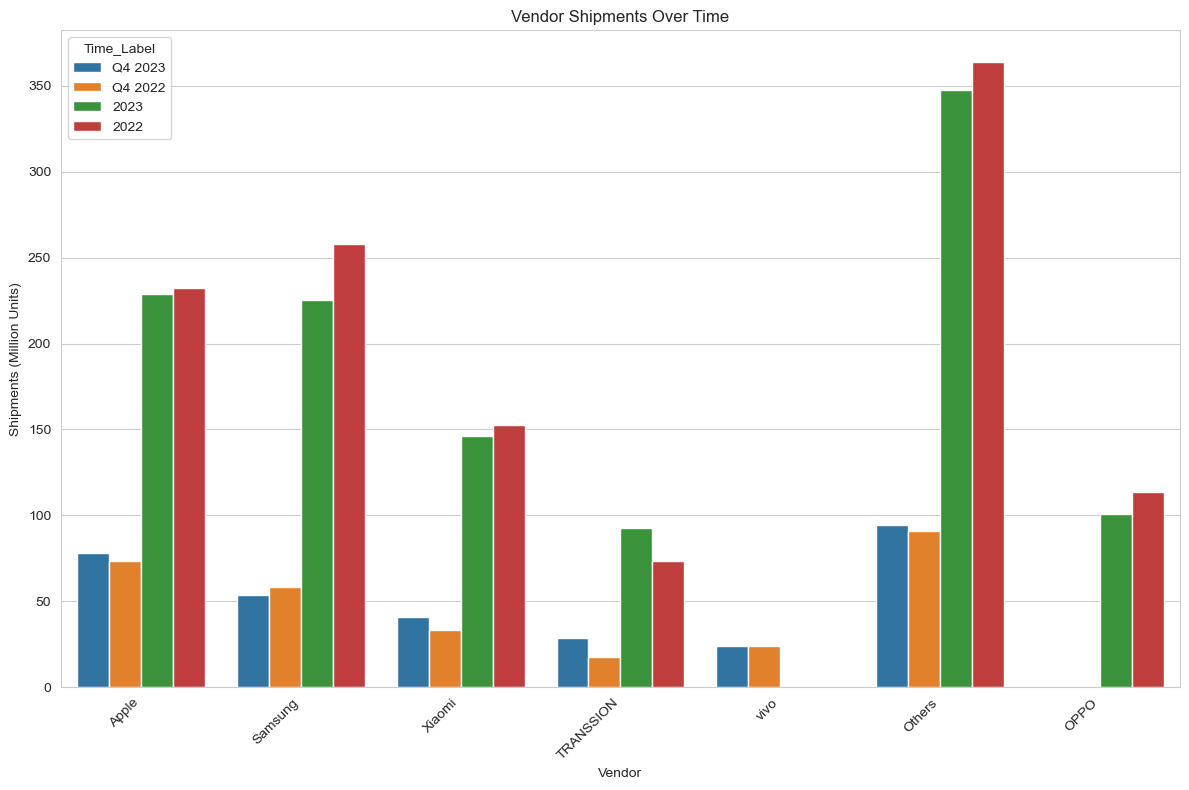

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# 讀取JSON檔案
with open('merged_json.json', 'r') as file:
    json_data = json.load(file)

# 將JSON數據轉換為DataFrame
df = pd.DataFrame(json_data)

# 將DataFrame從寬格式轉換為長格式，以便於視覺化
df_long = pd.melt(df, id_vars=["Vendor"], var_name="Time", value_name="Shipments (million)")

# 嘗試提取季度和年份，並創建一個新的時間標籤列
time_extraction = df_long['Time'].str.extract('([Q\d]{2})(\d{4})')
df_long['Time_Label'] = time_extraction[0].fillna('') + ' ' + time_extraction[1].fillna('')

# 對於不含有季度的時間（即年度數據），直接使用年份
year_extraction = df_long['Time'].str.extract('(\d{4})')
df_long['Time_Label'] = df_long['Time_Label'].mask(df_long['Time_Label'] == ' ', year_extraction[0])

# 視覺化
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x='Vendor', y='Shipments (million)', hue='Time_Label', data=df_long[df_long['Vendor'] != 'Total']) # 排除匯總行
plt.title('Vendor Shipments Over Time')
plt.xlabel('Vendor')
plt.ylabel('Shipments (Million Units)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


C:\Users\zeric\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


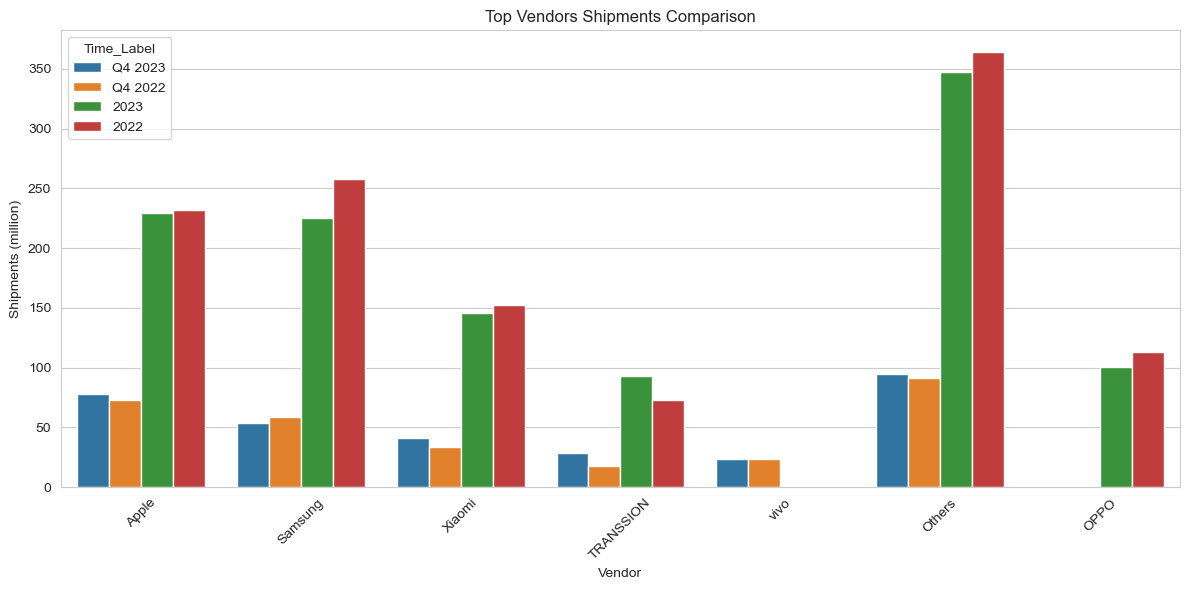

C:\Users\zeric\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


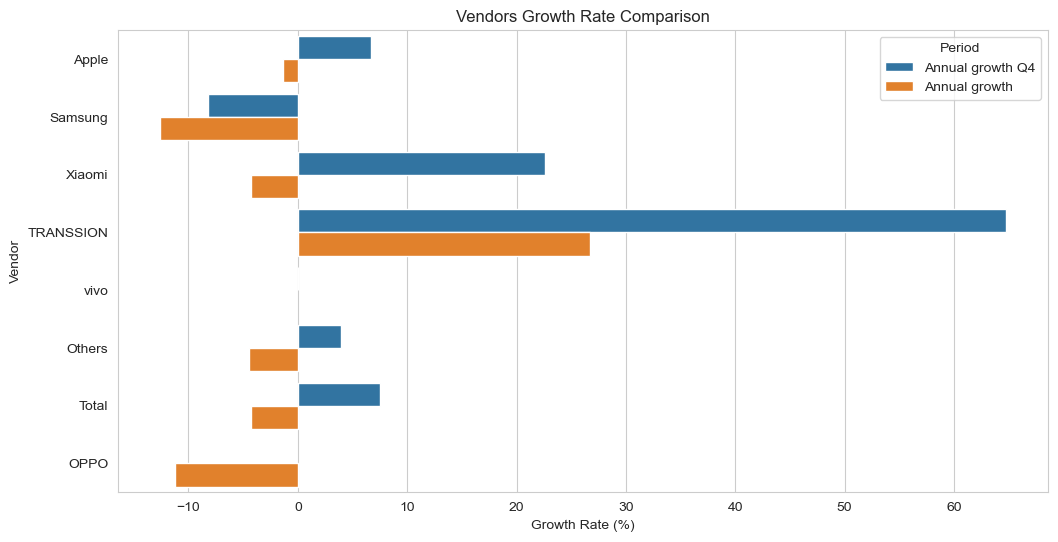

C:\Users\zeric\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


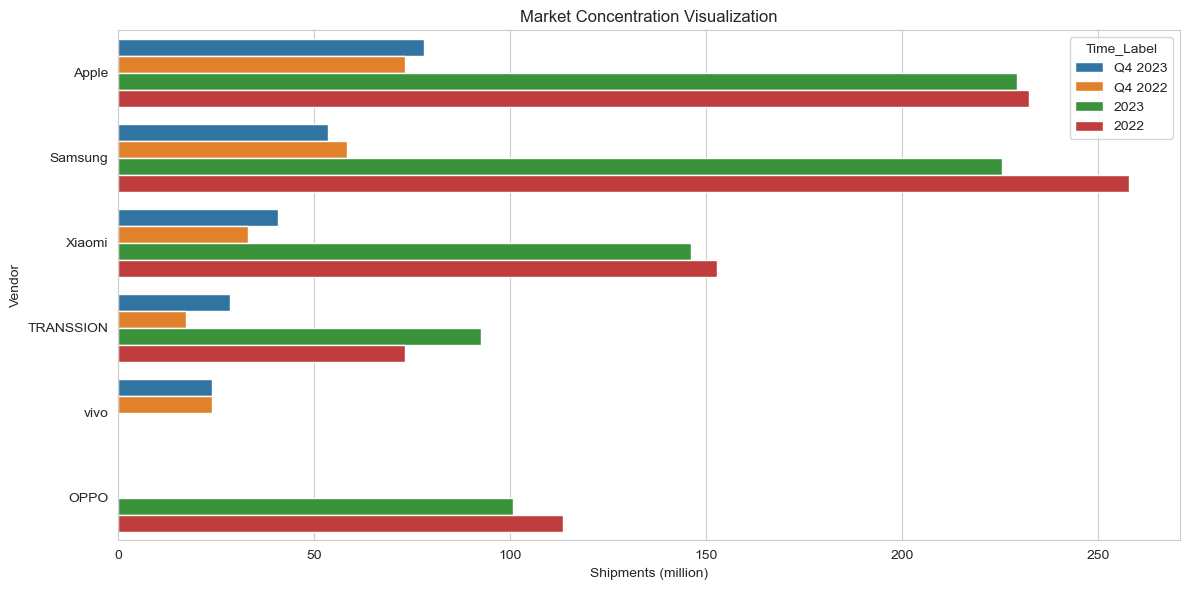

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

# 讀取JSON檔案
with open('merged_json.json', 'r') as file:
    json_data = json.load(file)

# 將JSON數據轉換為DataFrame
df = pd.DataFrame(json_data)

# 計算年增長率
df["Annual growth Q4"] = ((df["Q42023 shipments (million)"] - df["Q42022 shipments (million)"]) / df["Q42022 shipments (million)"]) * 100
df["Annual growth"] = ((df["2023 shipments (million)"] - df["2022 shipments (million)"]) / df["2022 shipments (million)"]) * 100

# 整理數據，並將數據準備成長格式來回答這三個問題
# 將DataFrame從寬格式轉換為長格式，以便於視覺化
df_long = pd.melt(df[df['Vendor'] != 'Total'], id_vars="Vendor", var_name="Time", value_name="Shipments")

# 嘗試提取季度和年份，並創建一個新的時間標籤列
time_extraction = df_long['Time'].str.extract('([Q\d]{2})(\d{4})')
df_long['Time_Label'] = time_extraction[0].fillna('') + ' ' + time_extraction[1].fillna('')

# 對於不含有季度的時間（即年度數據），直接使用年份
year_extraction = df_long['Time'].str.extract('(\d{4})')
df_long['Time_Label'] = df_long['Time_Label'].mask(df_long['Time_Label'] == ' ', year_extraction[0])

# 準備繪圖數據
df_plot = df.melt(id_vars="Vendor", value_vars=["Q42023 shipments (million)", "2023 shipments (million)"], var_name="Period", value_name="Shipments")

# 1.在年度與季度資料中，我想比較前五名廠商是否皆相同，若有不同則是何種廠牌?
# 由於數據已經預處理並只包含前五名（除了 "Others" 和 "Total"），我們可以直接使用處理後的df_long來進行視覺化
plt.figure(figsize=(12, 6))
sns.barplot(x='Vendor', y='Shipments', hue='Time_Label', data=df_long)
plt.title('Top Vendors Shipments Comparison')
plt.xlabel('Vendor')
plt.ylabel('Shipments (million)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2.在年度與季度資料中，哪一家供應商的年度/季度成長率最高?
# 這裡我們將直接使用df_q中計算的增長率進行視覺化
growth_data = df[["Vendor", "Annual growth Q4", "Annual growth"]].melt(id_vars="Vendor", var_name="Period", value_name="Growth Rate")
plt.figure(figsize=(12, 6))
sns.barplot(x="Growth Rate", y="Vendor", hue="Period", data=growth_data)
plt.title('Vendors Growth Rate Comparison')
plt.xlabel('Growth Rate (%)')
plt.ylabel('Vendor')
plt.show()

# 3.前幾大供應商市占率如何，小供應商是否有立足之地?
# 使用出貨量來代表市場集中度
plt.figure(figsize=(12, 6))
sns.barplot(x='Shipments', y='Vendor', hue='Time_Label', data=df_long[df_long['Vendor'] != 'Others']) # 排除 "Others"
plt.title('Market Concentration Visualization')
plt.xlabel('Shipments (million)')
plt.ylabel('Vendor')
plt.tight_layout()
plt.show()


In [8]:
df_long

,Vendor,Time,Shipments,Time_Label
0,Apple,Q42023 shipments (million),78.100000,Q4 2023
1,Samsung,Q42023 shipments (million),53.500000,Q4 2023
2,Xiaomi,Q42023 shipments (million),40.700000,Q4 2023
3,TRANSSION,Q42023 shipments (million),28.500000,Q4 2023
4,vivo,Q42023 shipments (million),23.900000,Q4 2023
...,...,...,...,...
67,Samsung,Annual growth,-12.563009,NaN
68,Xiaomi,Annual growth,-4.322200,NaN
69,OPPO,Annual growth,-11.199295,NaN
70,TRANSSION,Annual growth,26.675787,NaN
